In [1]:
#pip install pydicom
import pandas as pd
import numpy as np
import pydicom as dicom
import matplotlib.pylab as plt 
import os


In [3]:
path = r'C:\Users\Lucas\Desktop\UFABC\TG\Bases'

def path_arquivos(path):
    path_n1 = path
    files_n1 = os.listdir(path_n1)
    path_imagens = dict()
    img_0 = dict()

    for arq1 in files_n1:
        path_n2 = path_n1 + '\\' + arq1
        files_n2 = os.listdir(path_n2)
        
        path_n3 = path_n2  + '\\' + files_n2[0]
        files_n3 = os.listdir(path_n3)

        path_n4 = path_n3  + '\\' + files_n3[0]
        files_n4 = os.listdir(path_n4);

        path_n5 = [path_n4  + '\\' + arquivo for arquivo in files_n4]
        path_imagens[f'{arq1}'] = path_n5

        img_0[f'{arq1}'] = (path_n5[0])
    return path_imagens, img_0


In [4]:
path_imagens, img_0 = path_arquivos(path)

## Verificando Histograma

In [7]:
path_ex = path_imagens['STS_009'][126]

ds = dicom.dcmread(path_ex)

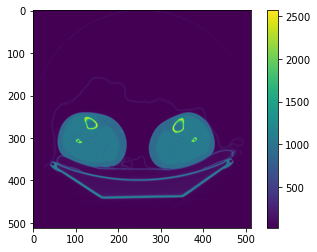

In [8]:
img = ds.pixel_array

plt.imshow(img)
plt.colorbar()

In [47]:
x, y = img.shape

def valor_mais_proximo(vetor, valor_procurado):
    delta = np.absolute(vetor - valor_procurado)
    index = delta.argmin()

    return index



def somatorio_dimensao(img, seleciona = 'coluna'):
    somatorio = []

    if seleciona == 'coluna':

        for coluna in range(y):
            soma = np.sum(img[:,coluna])
            somatorio.append(soma)
        return somatorio
        
    else:
        for linha in range(x):
            soma = np.sum(img[linha,:])
            somatorio.append(soma)
        return somatorio


def seleciona_perna(somatorio):
    maximo = np.where(np.max(somatorio) == somatorio)[0][0]
    somatorio2 = somatorio.copy()
    
    while maximo < y / 2:
        somatorio2[maximo] = -99999
        maximo = np.where(np.max(somatorio) == somatorio)[0][0]

    interval = maximo - 150;
    minimo = np.where(np.min(somatorio[interval:maximo]) == somatorio)[0][0]

    minimo_dir = valor_mais_proximo(somatorio[maximo:], somatorio[minimo]) + maximo + 20

    return minimo, minimo_dir




In [10]:
soma_col = somatorio_dimensao(img)
soma_linha = somatorio_dimensao(img, 'linha')

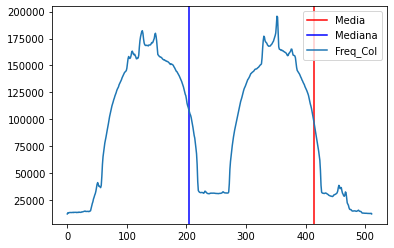

In [49]:
media = valor_mais_proximo(soma_col, np.sum(soma_col) / y)
mediana = valor_mais_proximo(soma_col, np.median(soma_col))


plt.axvline(media, color = 'r', label = 'Media', )
plt.axvline(mediana, color = 'b', label = 'Mediana')
plt.plot(range(y), soma_col, label = 'Freq_Col')
plt.legend()

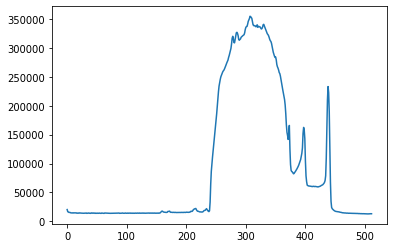

In [12]:
plt.plot(range(x), soma_linha)

237 451


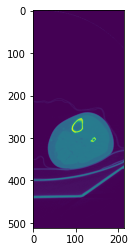

In [48]:
minimo, maximo = seleciona_perna(somatorio= soma_col)
print(minimo, maximo)

plt.imshow(img[:, minimo:maximo])

## Seleção de Slices

In [ ]:
#Usar depois da correção

imagens = dict()
for i in path_imagens.keys():
    for img in path_imagens[i]:
        ds = dicom.dcmread(img)
        imagens[f'{i}'] = ds.pixel_array
